# NVT

## Going from an isolated system $E=const$ to a system with fluctuating energies $E\neq const$

- We called NVE ensemble the collection of all possible microscpoic configurations each of which has constant number of particles, occopied constant volume and has constant energy (NVE).

- In the NVT ensemble we are going to relax $E=const$ which is a typical situation when system is connected to **heat bath or reservoir** and maintains a constant Temperature instead (recall Legendre transform.

- Thus, in the NVT ensemble energy of the system $E_i$ and energy of resrovir $E_r$ fluctuate while keeping $E_t=E_r + E_i=const$. Also since reservoir and system are in equilibrium then we know that $T_r = T_i = T=const$. 

- In NVE ensemble the probability distirbution was uniform across members of the ensemble $p_i = \frac{1}{\Omega}$. Below we shall show that probability distribution of system of interest $p(E_i)$ is going to be different thanks to different members of ensembles having different extensive thermodynamic variables!

$$E_t = E_r + E_i$$

$$\Omega_{t}(E_t) = \sum_i \Omega_r(E-E_i) \cdot \Omega(E_i)$$

Let us single out one micro-state $E_i$ of our system $\Omega(E_i) =1$ and see what would be its probability in NVT ensemble.

$$p_i = \frac{\Omega_r(E_{t}-E_i)}{\Omega_{t} (E_{t})} = \frac{e^{S_r(E_{t}-E_i)/k_B}}{e^{S_{t}(E)/k_B}}$$

Where we have used use the microcanonical ensemble of **system+reservoir** to cast the problem in terms of probabilities of **the system**.

### Derivation of Boltzmann distribution

Since entropy is a smoothly varying function of energy we can expand it around $E_{tot}$ as $E_i$ is a much smaller quantity.

$$S_r(E_{t}-E_i) \approx S_r(E_{t}) - \Big( \frac{\partial S_r}{\partial E}\Big) E_i = S_r(E_{t}) -\frac{E_i}{T}$$

This leads to $p_i \sim e^{-\beta E_i}$ were $\beta = \frac{1}{k_B T}$ after normalizing we obtain:

**Boltzmann distribution**

$$\boxed{p_i = \frac{e^{-\beta E_i}}{Z}}$$ 

**Partition function**

$$\boxed{Z= \sum_i e^{-\beta E_i} }$$

### Another derivation of Boltzmann distribution showing connection of Z with Free energy

A more revealing is the expansion around system's average energy 

$$U = \sum_i p_i E_i$$ 

which has small fluctuations around it 

$$U - E_i = \delta E_i \sim O(N^{1/2})$$


**Entropy of the reservoir**

$$S_r(E_{t}-E_i) = S_r(E_{t}-U + U-E_i) \approx S_r(E_{t}-U) +\Big( \frac{\partial S_r(E)}{\partial E}\Big) (U-E_i)$$


$$S_r(E_{t}-E_i) =  S_r(E_{t}-U) +\frac{1}{T}(U-E_i)$$

**Entropy of the total system.**

$$ S_{t}(E_{t}) = S_r(E_{t}-U)+S(U)$$


**Probability of a microstate**

$$p_i =\frac{e^{{S_r(E_{t}-E_i)/k_B}}}{e^{{S_{t}(E_{t})/k_B}}}$$

$$log\, p_i = S_r(E_{t}-E_i) - S_{t}(E_{t}) = \beta (U-E_i) - \frac{S(U)}{k_B} = -\beta E_i +\beta (U-TS)$$

**Heat bath's contribution to the system's distribution of energies comes through the temperature**

$${ p_i = \frac{e^{-\beta E_i}}{e^{-\beta F}} = \frac{e^{-\beta E_i}}{Z} }$$

**Free Energy is directly related to partition function**

$$\boxed{Z = e^{-{\beta F}}}$$

$$\boxed{F = -\beta^{-1} log Z}$$

### Closer look at the Z: The partiation function



$$\boxed{Z(\beta) = \sum_i e^{-\beta E_i} = \int \Omega(E) e^{-\beta E}dE = \int e^{-\beta (E-TS)}dE }$$


- The parition function is "partitioning" or disirbuting (exponentially) the states of NVT ensemble with different energy levels/values:
<br>

- It can be seen that $Z$, the partition function of NVT is **Laplace Transform** of density of states of NVE. While connection between energy and free energy $F= E -TS$ is  via **Legendre Transform** 
<br>

- $\Omega(E)\sim e^N$ rapidly increasing function with N eacsue of limit theorems: e.g the large deviation, central limit theorem, law of large numbers. 
<br>

- $e^{-\beta E}\sim e^{-N}$ rapidly decreasing function with N

- Thermodynamic limit $N, V\rightarrow \infty$ and $N/V \rightarrow const$ only the region of energy survivies hat guarantees non-negligible contribution

$$\boxed{Z = \int e^{-\beta (E-TS)}dE \approx e^{-\beta(U-TS)} = e^{-\beta F}}$$

Where $U =\langle E \rangle$ is the thermodynamic average energy, flucutatins around which are on order of $O(N^{1/2})$

In [2]:
import numpy as np
import matplotlib.pyplot as plt

N=10
kbT = 2.5

E = np.linspace(1, 10*N, 100)
omega  = E**(1.5*N)
boltzf = np.exp(-E/kbT)

fig,ax = plt.subplots(nrows=3,sharex=True, figsize=(6, 4))
ax[0].plot(E, omega)
ax[0].set_ylabel('$\Omega(E)$')
ax[1].plot(E, boltzf)
ax[1].set_ylabel('$exp(-E/k_B T)$')
ax[2].plot(E, omega*boltzf)
ax[2].set_ylabel('$\Omega(E) exp(-E/k_B T)$')
ax[2].set_xlabel('$E$')

Text(0.5, 0, '$E$')

### Why free energy is a central quantity in the NVT ensemble.


As we have learned in Thermodynamics, after legendre transorm $NVE\rightarrow NVT$ the entropy maximiziation (energy minimization) principle gets replaced by the free energy minimization prinicple.  

Now we can show thatn indded the free energy governs probabilities of states in the NVT ensemble:

$$p_1 =\frac{\Omega (E_1) e^{-\beta E_1}}{Z} = \frac{e^{-\beta F_1}}{e^{-\beta F}}$$

Often we re interested in relative probabilities of different states, e.g conformation A vs B of polymer:

$$\frac{p_2}{p_1} = e^{-\beta (F_2-F_1)} $$

### logZ as cumulant generating function

- **Moment generation function $M(k)$**

$$M(k) = \int p(x) e^{kx} dx = \langle e^{kx} \rangle$$

$$M(k) = 1 +\langle x \rangle k + \frac{1}{2!} \langle x^2 \rangle k^2 + ...$$

- **Cumulant generation function $C(k)=log M(k)$:**

$$C(k) = log M(k) = log \langle e^{kx} \rangle$$

$$\langle e^{kx} \rangle = e^{C(k)} = e^{[1 +\langle x \rangle k + \frac{1}{2!} \langle x^2 \rangle k^2 + ...]}= 1+\kappa_1 k^2 +\kappa_2 k^2 + ...$$

First two cumulants are mean and fluctuation!

1. $\kappa_1 = \langle x \rangle$

2. $\kappa_2 = \langle (x-\langle x \rangle)^2 \rangle$ 

### Energy fluctuations

$$\langle E \rangle = \frac{\partial log Z}{\partial (-\beta)}$$

$$\sigma^2_E = \frac{\partial^2 log Z}{\partial \beta^2} = -\frac{\partial \langle E \rangle}{\partial \beta} = k_BT^2 C_v$$

$$\frac{\sigma_E}{\langle E\rangle} = \frac{(k_BT^2 C_v)^{1/2}}{\langle E\rangle}\sim O(N^{-1/2})$$

### Microscopic origins of quasistatic process, heat, work and entropy

$$U = \langle E\rangle =\sum_i p_i E_i$$

$$dU = \sum_i p_i dE_i + \sum_i E_i dp_i = \delta W +\delta Q$$

## The power and utility of NVT: The non-interacting system

**distinguishable states**:

$$Z = z^N$$

**indistinguishable states**:

$$ Z = \frac{1}{N!}z^N $$

**Strategy for using NVT**

1. Compute the partition function of a single particle $z= e^{-\beta \epsilon_1}+  e^{-\beta \epsilon_2}+ ...$

2. raise to the power of N and apply factorial in case of indistinguishable particles, $Z= \Big (e^{-\beta \epsilon_1}+  e^{-\beta \epsilon_2}+ ... \Big)^N$ 

3. Compute the free energy $F= - N k_B T log z$

4. Take derivatives of Z and/or free energy to get the thermodynamics. 

##  Ensemble equivalence

### Example-1: A two state model

Let us consider simple two level system where lower level $\epsilon_0 = 0$ and upper level $\epsilon_1 =\epsilon$. We will now use $NVE$ ensemble to obtian thermodynamic quantities $(S, T, C_v)$ and then obtain same quantities with $NVT$.

$$E = n\epsilon$$

$$\Omega(E) = \frac{N!}{(N-n)! n!}$$

$$S = k_B log \Omega(E) = N k_B \Big [- \frac{n}{N}log \frac{n}{N} - \frac{N-n}{N}log \frac{N-n}{N} \Big]$$

$$\frac{1}{T} = \frac{\partial S(E)}{\partial E} =  \frac{k_B}{\epsilon}\frac{\partial log\Omega(n)}{\partial  n} = \frac{k_B}{\epsilon}log \frac{N-n}{N}$$

$$\frac{n}{N} = \frac{1}{1+e^{\beta \epsilon}}$$

$$E = n\epsilon = \frac{N\epsilon}{1+e^{\beta \epsilon}}$$

### Parition function decouples non-interacting terms in energy!

<br>

$$Z = \sum^{n=N}_{n=0} e^{-\beta E_n} =  \Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)\Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big)...\Big (\sum^{i=1}_{i=0} e^{-\beta \epsilon_i} \Big) = (1+e^{-\beta \epsilon})^N$$

<br>

$$F= -k_B T log Z = -k_BT N log(1+e^{-\beta \epsilon})$$

<br>

$$\langle E \rangle  = \frac{\partial log Z}{\partial (-\beta)} =  \frac{N\epsilon}{1+e^{\beta \epsilon}}$$

In [12]:
from ipywidgets import interact

@interact(eps=(0.1,1))
def E_two_sys(eps):
    
    kbT =  np.linspace(0,5,1000)
    E    = eps/(1+np.exp(eps/kbT))
    
    plt.plot(E, kbT)


interactive(children=(FloatSlider(value=0.55, description='eps', max=1.0, min=0.1), Output()), _dom_classes=('…

### Example-2: Ideal gas (classical)

$$H(p^N, x^N) = K(p^N)  = \sum^{i=N}_{i=1}\frac{p^2_i}{2m}$$

$$\boxed{Z(\beta) = \frac{1}{h^{N} N!} \int dp^N dx^N e^{-\beta H(p^N,x^N)}}$$

$$Z(\beta) = \frac{V^N}{h^{N} N!} \Big [ \int^{+\infty}_{-\infty} dp e^{-\beta \frac{p^2}{2m}}  \Big ]^N = \frac{V^N}{h^{N} N!} \Big [ \frac{2\pi m}{\beta} \Big]^N  $$
<br><br>

$$F = -k_B T log Z \approx -N k_B T log \Big [log \Big(\frac{V}{N}\Big)\frac{1}{\lambda^3} +1\Big]$$
<br><br>

- Note linear dependence on N. Entropy is an extensive quantity!

- exponent 3/2 reflexts that each particle has 3 degrees of freedom

- $\lambda = \Big(\frac{3h^2 N}{4\pi m E}\Big)^{1/2}$ thermal de Broglie wavelength.

- $$\langle E \rangle = \frac{\partial log Z}{\partial (-\beta)} = \frac{3}{2}N k_B T$$
<br><br>

- $$p = -\frac{\partial F}{\partial V} =\frac{N k_B T}{V}$$
<br><br>
- $$S = \frac{E-F}{T} = k_B N \cdot  \Big [ log \Big(\frac{V}{N \lambda^3}\Big) + \frac{5}{2}\Big]$$
<br><br>

>  Entropy of ideal gas is eactly the same expression as what we obtained in NVE! 
>  Thermodynamics is the same regardless of the ensemble used! Consequence of smallnes sof fluctuations.

### Example-3 Ideal paramagnet of spin 1/2

$$E  = -\mu B \sum^{N}_j s_j $$

- $s_j = \pm 1$ spin variable can assume two values that we refer to as up and down. 

$$Z = \sum_{E} exp(-\beta E) = \sum_{s_1, s_2, ... s_N} exp \Big( \beta \mu B \sum^{N}_j s_j \Big) = \Big [ \sum_{s_1} exp \Big( \beta \mu B  s_1 \Big) \Big ]... \Big [ \sum_{s_N} exp \Big( \beta \mu B s_N \Big) \Big ]$$

Now it is easty to see that partion function factorizes

$$Z =Z_1^N$$

$$Z_1 = \sum_{s_1} exp(\beta \mu B s_1) = exp(\beta \mu B) + exp(-\beta \mu B)  = 2 cosh(\beta \mu B)$$

**Free energy as as function of temperature and magnetic field:** Now we can establish a connection with thermodynamics by computing free energy function

$$ F(T, H) = - \beta^{-1} log Z = - N \beta^{-1} log \Big [ 2 cosh (\beta \mu B )  \Big ]$$

The entropy is obtained by taking derivative with respect to temperature

$$S = - \Big(\frac{\partial F}{\partial T} \Big)_H = k_B log \Big [ 2 cosh (\beta \mu H )  \Big ] - k_B (\beta \mu B)\cdot tanh (\beta \mu B)$$

**Magnetization**

Magnetization $M$ (extensive quantity) or magnetization per particle $m=M/N$ (intensive quantity) is given as another free energy derivative:

$$M = - \Big(\frac{\partial F}{\partial B} \Big)_T = \mu tanh \Big(\beta \mu B \Big)$$

> Note that the same expression is obtained when computing average value of magnetization as expected $M = \langle \mu \sum_{s_j} \rangle$

**Magnetizatic susceptibility**

In the context of paramagnet we have another response function in the form of magnetic susceptibility

$$\chi(T, B) =  \Big(\frac{\partial m}{\partial B} \Big)_T = \mu^2 \beta B cosh^{-2} (\beta \mu B)$$

which leads to a well known **Curie Law**

$$\chi(T, B=0) = \frac{\mu^2 H}{k_B T}$$

Finally as a consitency check we can combine enetrpy and free energy expressions to obtain internal energy:


$$U = F+TS = -\mu B tanh(\beta \mu B)$$

Text(0.5, 0, 'B')

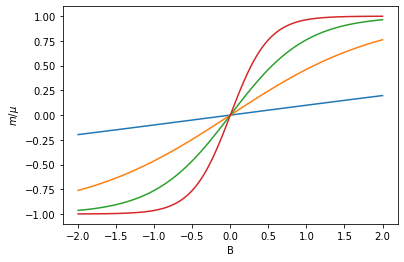

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x=np.linspace(-2, 2, 100)
for beta in [0.1, 0.5, 1, 2]:
    plt.plot(x, np.tanh(beta*x))
    
plt.ylabel('$m/\mu$')    
plt.xlabel('B')

## Problems

### Problem-1 Elementary derivation of Boltzmann's distirbution

Let us do an elementary derivation of Boltzman distribution showing that when a macroscopic system is in equilibrium and coupled to a heat bath at temperatere T we have a universal dependence of probability for finding system at different energies: 

$$\boxed{P(r')/P(r)=e^{-\beta (U(r)-U(r'))}}$$

The essence of the derivation is this. Consider a vertical column of gas somehre in the mountains. On one hand we have graviational force which acts on a column between h, h+dh with cross section A. On the other hand we have pressure balance which thankfully keeps the molecules from dropping on the ground. This means that we have a steady density of molecules at each distance n(h) for fixed T. Write down this balance of forces(gravitational vs pressure ) and find show how density at h, n(h) is related to density at h=0, n(0). 

> Tip: you may use P=nkT for pressure and mgh for the gravitational force) 

### Problem-2 Three level system



Consider a system of N classical and noninteracting particles in contact with a thermal reservoir at temperature T. Each particle may have energies $0$, $\epsilon$ and $3\epsilon$ where $\epsilon>0$ is sone constact number. 

- Obtain an expression of Z and from it compute average energy and energy flcutuation.

- Plot heat capacity as a function of temperature $C_v(T)$

- Plot average enegy as a function of temperature $U(T)$

- Plot entropy as a function of temperature $S(T)$. 



### Problem-3 Spins on a lattice

N lattice sites have quantum spins of $S=1$ associated with each spin is a mangnetic moment $\mu$ and in a uniform mangeitc field in z direction $B=B_z$ the energy of each spin is $-\mu B m $ where $m$ is the magnetic quantum number tellins us that spin can only point in discrete number of direction ($m=0, \pm 1$). 

- Compute the entropy $S$ and the mangeitzation of the system $M$

- Plot and study the limit of $S(T\rightarrow 0)$



### Problem-4 2D diploes on a lattice

There is a 2D square lattice with M lattice points. On each oint sits a mangeetic moment that can point in four directions: $+x, -x, +y, -y$. Along y diploe has energy $\epsilon>0$ and laong x $\epsilon=0$.

Dipols are not interacting with each other and we also ingnore kinetic energy of diplos since they ar efixed at lattice positions. 

- Write down parition function for this system $Z$

- Compute average energy

- Compute $s(T)$ per dipole. Evaluate the difference $S(T=\infty)-S(T=0)$? Can you see a link with number of arrangements of dipols.

- Compute microcanonical partition function $\Omega (N\epsilon)$

- Show that entropy computed with NVE and NVT agree with each other

### Problem-5 A typical spin problem 

Due to ligand field the degeneracy of d-orbital of chromium ion $Cr^{3+}$ is partially lifted. The spin part of the hamiltonian that lifts this degeneracy has the following form.

$$H =  D \big(S_z^2 -S(S+1)/2 \big)$$

Where $D>0$ is some constant and $S=3/2$ (the cation has electronic term ${F}^ 4_{3/2}$

- Why can we apply statisical mechanics to a "single" ion?

- Obtain occupation probability of each discrete energy level $P(E)$.

- Calculate entropy and the specific heat then show that heat capacity behaves as $T^{-2}$ at high temperatures.

- Supose heat capacity is $C=k_b \Big(\frac{T}{T_0} \Big)^2$ with $T_0=0.18 K$ at higher temperatures. Determine the energy spacing. 